In [23]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1> Part 1 </h1>

<h3>a)</h3>

In [12]:
def gradient_descent_with_momentum(f, df, initial_x, initial_y, learning_rate, momentum, epsilon, max_iterations):
        x, y = initial_x, initial_y
        prev_dx, prev_dy = 0,0

        for i in range(max_iterations):
            gradient_x, gradient_y = df(x,y)
            dx = momentum*prev_dx - learning_rate*gradient_x
            dy = momentum*prev_dy - learning_rate*gradient_y
            x+=dx
            y+=dy

            if abs(gradient_x)<epsilon and abs(gradient_y)<epsilon:
                break

        prev_dx, prev_dy = dx, dy

        return x,y

<h3> b)</h3>

In [13]:
def adam_optimizater(f, df, initial_x, initial_y, learning_rate, beta1 =0.9, beta2 = 0.999, epsilon = 1e-7, max_iterations =1000):
    x,y = initial_x, initial_y
    m_x, m_y = 0,0
    v_x, v_y =0,0
    t = 0
    beta1_t = 1
    beta2_t = 1

    for i in range(max_iterations):
        t+=1
        gradient_x, gradient_y = df(x,y)
        m_x = beta1* m_x+(1-beta1)*gradient_x
        m_y = beta1*m_y + (1-beta1)*gradient_y
        v_x = beta2*v_x+(1-beta2)*(gradient_x**2)
        v_y = beta2 * v_y + (1 - beta2) * (gradient_y**2)
        m_x_hat = m_x / (1 - beta1_t) 
        m_y_hat = m_y / (1 - beta1_t)
        v_x_hat = v_x / (1 - beta2_t) 
        v_y_hat = v_y / (1 - beta2_t)
        x -= learning_rate * m_x_hat / (np.sqrt(v_x_hat) + epsilon)  
        y -= learning_rate * m_y_hat / (np.sqrt(v_y_hat) + epsilon)
        beta1_t *= beta1
        beta2_t *= beta2

    return x, y

<h1>Part 2</h1>

In [20]:
# Define a simple quadratic function
def f(x, y):
    return x**2 + 4*y**2

# Define the gradient of the function
def df(x, y):
    gradient_x = 2*x
    gradient_y = 8*y
    return gradient_x, gradient_y

# Implement the ADAM optimization algorithm
def adam_optimizer(f, df, initial_x, initial_y, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-7, max_iterations=1000):
    x, y = initial_x, initial_y
    m_x, m_y = 0, 0
    v_x, v_y = 0, 0
    t = 0

    for i in range(max_iterations):
        t += 1
        gradient_x, gradient_y = df(x, y)
        m_x = beta1 * m_x + (1 - beta1) * gradient_x
        m_y = beta1 * m_y + (1 - beta1) * gradient_y
        v_x = beta2 * v_x + (1 - beta2) * (gradient_x**2)
        v_y = beta2 * v_y + (1 - beta2) * (gradient_y**2)
        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)
        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)
        
        x -= learning_rate * m_x_hat / (np.sqrt(v_x_hat) + epsilon)
        y -= learning_rate * m_y_hat / (np.sqrt(v_y_hat) + epsilon)

    return x, y

# Initial values
initial_x, initial_y = 5, 5
learning_rate = 0.1
epsilon = 1e-6
max_iterations = 100

# Find the minimum using ADAM optimization
result_adam = adam_optimizer(f, df, initial_x, initial_y, learning_rate, epsilon=epsilon, max_iterations=max_iterations)

print("Minimum using ADAM Optimization:", result_adam)


Minimum using ADAM Optimization: (-0.03900397528024899, -0.03900401766182566)


<h1>Part 3</h1>

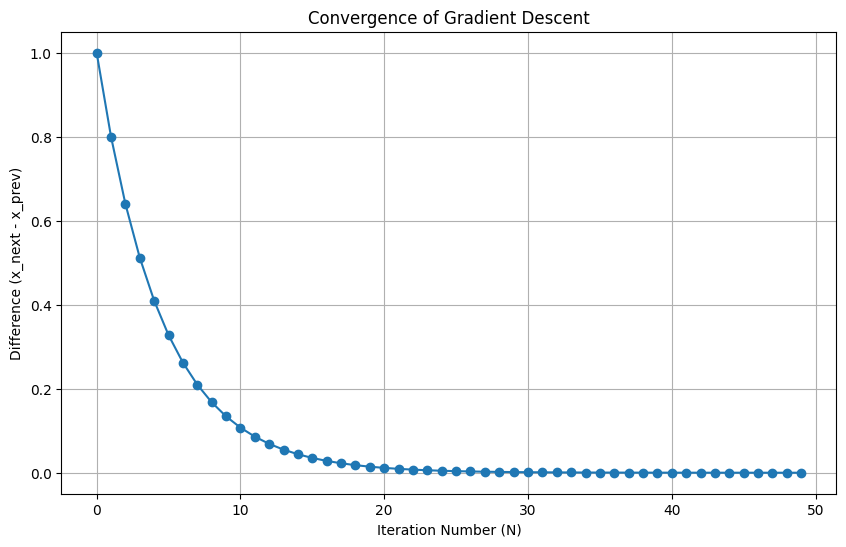

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the optimization function and its gradient
def f(x):
    return x**2 + 4  

def df(x):
    return 2*x  # Gradient of the function

# Implement the optimization algorithm (e.g., gradient descent)
def gradient_descent(f, df, initial_x, learning_rate, max_iterations):
    x = initial_x
    x_values = [x]  # Store the values of x for plotting
    convergence = []  # Store the differences for plotting

    for i in range(max_iterations):
        gradient = df(x)
        x_next = x - learning_rate * gradient
        x_values.append(x_next)
        convergence.append(abs(x_next - x))
        x = x_next

    return x_values, convergence

# Initial values
initial_x = 5
learning_rate = 0.1
max_iterations = 50

# Run the gradient descent algorithm
x_values, convergence = gradient_descent(f, df, initial_x, learning_rate, max_iterations)

# Create the iteration number (N) array
iteration_numbers = list(range(max_iterations))

# Plot the convergence graph
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, convergence, marker='o', linestyle='-')
plt.title('Convergence of Gradient Descent')
plt.xlabel('Iteration Number (N)')
plt.ylabel('Difference (x_next - x_prev)')
plt.grid()
plt.show()


<h1>Part 4</h1>

The accuracy of the implemented algorithms depends on various factors, including the choice of optimization algorithm, hyperparameters, and the specific form of the function being optimized. Here are some key conclusions regarding the accuracy of the algorithms:
1. Gradient Descent(GD):
Gradient Descent is a fundamental optimization algorithm that performs reasonably well for smooth and convex functions. 
The accuracy of GD depends on the learning rate. A well-chosen learning rate ensures convergence to the minimum, while a poorly chosen learning rate may lead to slow convergence or divergence 
GD might struggle with complex functions that have multiple local minima, making it sensitive to the initial starting poin

2. Gradient Descent with Momentum:

Gradient Descent with Momentum improves the convergence of GD by adding a momentum term.
It can overcome some of the limitations of GD and converge faster, especially for functions with narrow and elongated valle s.
The choice of momentum coefficient is crucial. Too high a value can cause oscillations, while too low a value may not provide a substantial improvem

3. ADAM Optimization:

ADAM is a popular optimization algorithm known for its adaptive learning rates and momentum term .
It can adapt to different learning rates for each parameter and provides an effective balance between the previous two methods.
ADAM is suitable for a wide range of functions and is often considered a reliable choice for many optimization ta

4. The specific form of the function being optimized plays a critical role in the accuracy of these algorithms. Functions with smooth, convex surfaces are easier to optimize, while non-convex functions with multiple local minima might require more sophisticated techniques.
   
5. The choice of initial values for optimization is essential. Starting from different initial points can lead to different local minima.
6. Monitoring the convergence, as demonstrated in the convergence graphs, is vital to assess the accuracy of the optimization process. It helps determine whether the algorithm is converging to a solution or if further adjustments are required.
   sks.ent.t.